<a href="https://colab.research.google.com/github/ankitatiwari7870/Zomato_Eda/blob/main/ZOMATO_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries.

In [2]:
# To load data from file
import pandas as pd 

# To perform mathemetiacal operations
import numpy as np

# To visualize data and get insight from the data
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid the warning that aren't necessarily exceptions
import warnings
warnings.filterwarnings('ignore')

# Sets the backend of seaborn to the 'inline' backend
sns.set()
# Sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Pre-defining the font type and size to provide same throughout the code
font = {'family' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


In [3]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Loading the csv file from the path
csvfile=('/content/drive/MyDrive/ZOMATO_EDA/zomato.csv')
df_zom=pd.read_csv(csvfile, encoding = "ISO-8859-1", engine='python')

# Data Wrangling And analysing the features

In [5]:
#Loading excel file of countrycode andd further creating column of currency as per indian ruppee.
country_df=pd.read_excel('/content/drive/MyDrive/ZOMATO_EDA/Country-Code.xlsx')
country_df
currency_value_inr=np.array([1,56,16,60,0.0053,52,1.46,21,56,5,0.23,5.2,21,99,76])
curren=pd.DataFrame({'INR_value':currency_value_inr})
cdf=pd.concat([country_df,curren],axis=1)
cdf

,Country Code,Country,INR_value
0,1,India,1.0000
1,14,Australia,56.0000
2,30,Brazil,16.0000
3,37,Canada,60.0000
4,94,Indonesia,0.0053
5,148,New Zealand,52.0000
6,162,Phillipines,1.4600
7,166,Qatar,21.0000
8,184,Singapore,56.0000
9,189,South Africa,5.0000


In [6]:
#merging cdf dataframe having country code and currency with original dataframe.
df=pd.merge(df_zom,cdf,on='Country Code',how='left')

In [7]:
#printingg first five elements from the dataset
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,INR_value
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,1.46
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,1.46


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
# checking all the the columns of the dataframe which were not visible.
pd.set_option('display.max_columns', None)

* Summary statistics of object columnns.

In [10]:
df.describe(include='object').T

,count,unique,top,freq
Restaurant Name,9551,7446,Cafe Coffee Day,83
City,9551,141,New Delhi,5473
Address,9551,8918,"Dilli Haat, INA, New Delhi",11
Locality,9551,1208,Connaught Place,122
Locality Verbose,9551,1265,"Connaught Place, New Delhi",122
Cuisines,9542,1825,North Indian,936
Currency,9551,12,Indian Rupees(Rs.),8652
Has Table booking,9551,2,No,8393
Has Online delivery,9551,2,No,7100
Is delivering now,9551,2,No,9517


* Summary statistics of numerical columnns.

In [11]:
# viweing numerical value statisctics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04
INR_value,9551.0,6.019645e+00,1.849601e+01,0.005300,1.000000,1.000000e+00,1.000000e+00,9.900000e+01


In [12]:
# chekcing null value in our dataset
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
INR_value               0
dtype: int64

#1. Top 5 restr acoording to Number of Availablities

In [13]:
#we caan check it either by groupby or by value counts.
top_5_rest=df.groupby(['Restaurant Name']).size().reset_index(name='number_of_count').sort_values(by=['number_of_count'],ascending=False).head(5)
#top_5_rest['Restaurant Name'].value_counts()
top_5_rest

,Restaurant Name,number_of_count
1099,Cafe Coffee Day,83
2099,Domino's Pizza,79
6106,Subway,63
2717,Green Chick Chop,51
4077,McDonald's,48


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


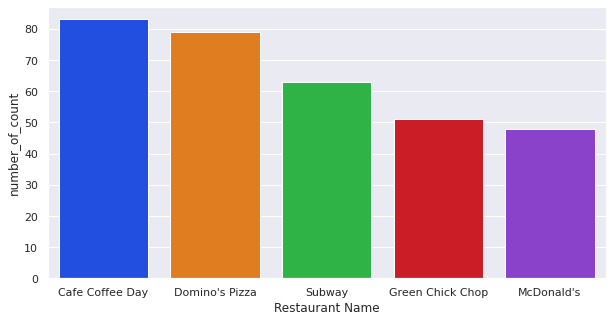

In [14]:
# Using countplot from seaborn to get the count of  each type of hotel
sns.set_palette('bright')
plt.figure(figsize = (10,5))
sns.barplot(x='Restaurant Name',y='number_of_count',data=top_5_rest)



* Country wise most available restaurant

In [15]:
top_res_group=df.groupby(['Country','Restaurant Name']).size().reset_index(name='number_of_count').sort_values(by=['number_of_count'],ascending=False)
top_res_group

,Country,Restaurant Name,number_of_count
1062,India,Cafe Coffee Day,83
1976,India,Domino's Pizza,79
5523,India,Subway,63
2487,India,Green Chick Chop,51
3690,India,McDonald's,48
...,...,...,...
2638,India,Havemore,1
2637,India,Haveliram,1
2636,India,Hauz Khas Social,1
2635,India,Haunted,1


In [16]:
# After removing duplicates values from restraurant name column we got most available restaurant.
top_res_each_country=top_res_group.drop_duplicates('Country')[['Country','Restaurant Name','number_of_count']]
top_res_each_country

,Country,Restaurant Name,number_of_count
1062,India,Cafe Coffee Day,83
7398,United States,Texas Roadhouse,4
6987,United Kingdom,Chaophraya,3
6923,UAE,Applebee's,3
6704,Indonesia,Talaga Sampireun,3
6914,Turkey,Timboo Cafe,2
6763,Phillipines,Silantro Fil-Mex,2
40,Brazil,Coco Bambu,2
0,Australia,1918 Bistro & Grill,1
6865,South Africa,Truth Coffee,1


# 2.Top 5 restaurant according to(highest price)and(lowest price)

In [17]:
# Creating a column New avg for two which will represent the average value as per INR.
df['New avg for two']=df['Average Cost for two']*df['INR_value']
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,INR_value,New avg for two
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,1.46,1606.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,1.46,1752.0


In [18]:
# Showing top five restaurant as per highest price using new avg cost of two columns.
top_5=df[['Restaurant Name','New avg for two']].sort_values(by=['New avg for two'],ascending=False).head(5)
top_5

,Restaurant Name,New avg for two
458,Restaurant Andre,28000.0
460,Jaan,24080.0
9384,Restaurant Gordon Ramsay,22770.0
461,Rhubarb Le Restaurant,17640.0
469,Summer Pavilion,16800.0


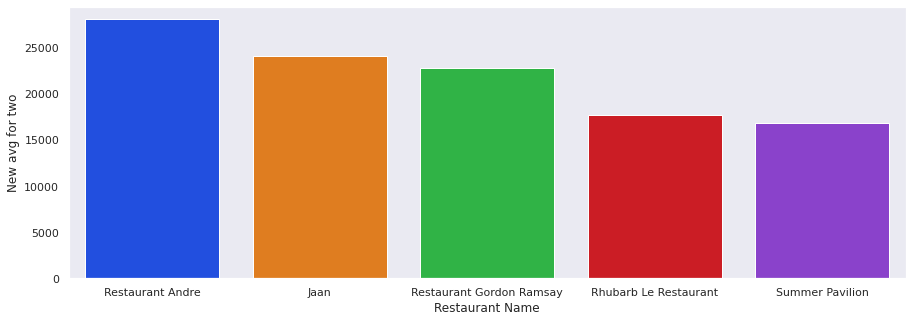

In [19]:
# displaying the above using seaborn barplot to visualise the top 5 restaurant as per price.
sns.set_palette('bright')
plt.figure(figsize = (15,5))
plt.grid(False)
sns.barplot(x='Restaurant Name',y='New avg for two',data=top_5)

# 3. Locality wise highest price

In [20]:
loc_price=df[['Locality','Country','New avg for two']].sort_values(by='New avg for two',ascending=False).head(10)
loc_price

,Locality,Country,New avg for two
458,"Cantonment Road, Outram",Singapore,28000.0
460,"City Hall, Downtown Core",Singapore,24080.0
9384,Chelsea,United Kingdom,22770.0
461,"Duxton Hill, Outram",Singapore,17640.0
469,"Marina Centre, Downtown Core",Singapore,16800.0
456,"Bayfront Avenue, Downtown Core",Singapore,16800.0
9484,West Park,South Africa,16050.0
9416,"The Midland, Deansgate",United Kingdom,15840.0
457,"Bayfront Subzone, Downtown Core",Singapore,15120.0
468,"Marina Centre, Downtown Core",Singapore,12320.0


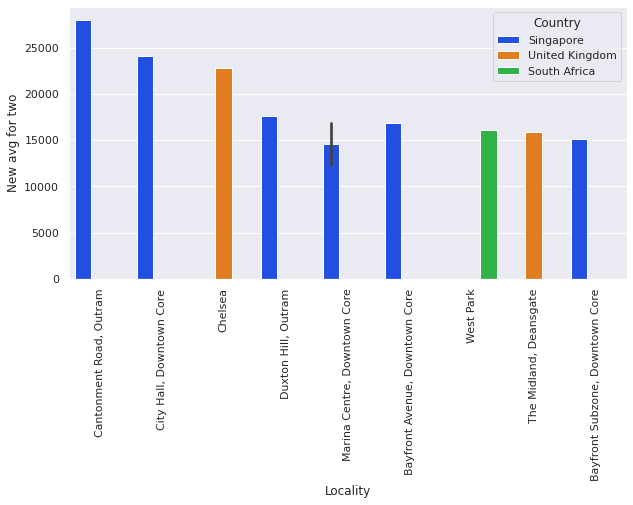

In [21]:
plt.figure(figsize = (10,5))
sns.set_palette('bright')
plt.xticks(rotation='vertical')
sns.barplot(x='Locality',y='New avg for two',hue='Country',data=loc_price)

# 4. Country wise number of restaurant

In [22]:
#Showing count of hotels listed by zomato in several countries.
cwb=df.groupby('Country').size().reset_index(name='count').sort_values(by=['count'],ascending=False).head(5)
cwb

,Country,count
3,India,8652
14,United States,434
13,United Kingdom,80
1,Brazil,60
9,South Africa,60


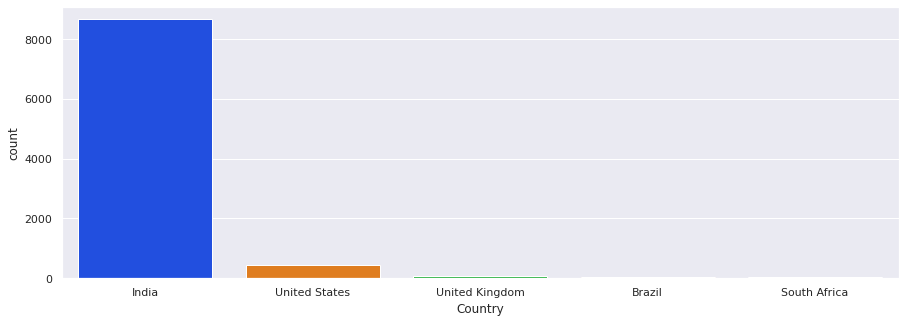

In [23]:
#displaying the above using seaborn barplot
sns.set_palette('bright')
plt.figure(figsize = (15,5))
sns.barplot(x='Country',y='count',data=cwb)

# 5.City wise  number of restaurant 

In [24]:
#Showing count of top ten hotels listed by zomato in various cities.
cyb=df.groupby('City').size().reset_index(name='count').sort_values(by=['count'],ascending=False)[:10]
cyb

,City,count
88,New Delhi,5473
50,Gurgaon,1118
89,Noida,1080
43,Faridabad,251
48,Ghaziabad,25
17,Bhubaneshwar,21
69,Lucknow,21
5,Amritsar,21
2,Ahmedabad,21
51,Guwahati,21


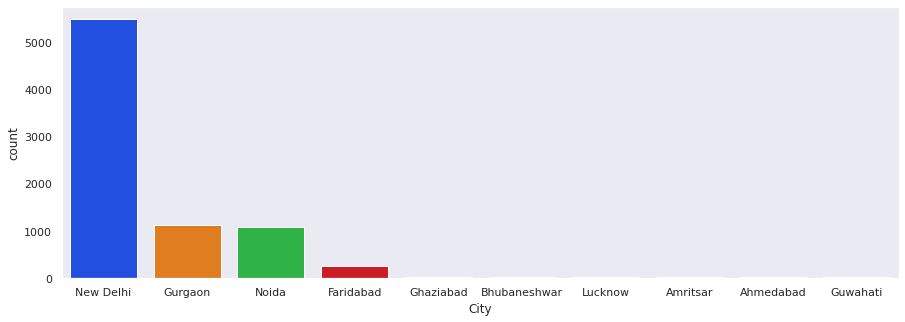

In [25]:
#displaying the above using seaborn barplot.
sns.set_palette('bright')
plt.figure(figsize = (15,5))
plt.grid(False)
sns.barplot(x='City',y='count',data=cyb)



# 6. Top restraunt in terms of rating

In [26]:
# Slicing out all the restraunt which are above 4.0 rating.
df_good_rest=df[df['Aggregate rating']>=4.0]

In [27]:
#grouping all the restaurant according to rating and count.
tr=df_good_rest.groupby(['Restaurant Name','Aggregate rating']).size().reset_index(name='count').sort_values(by=['count','Aggregate rating'],ascending=[False,False])
tr

,Restaurant Name,Aggregate rating,count
100,Barbeque Nation,4.9,5
93,Barbeque Nation,4.0,5
97,Barbeque Nation,4.5,4
21,AB's - Absolute Barbecues,4.9,3
1060,Talaga Sampireun,4.9,3
...,...,...,...
1284,What's Up,4.0,1
1288,Winona Forever,4.0,1
1290,Wood Stone,4.0,1
1292,Y Cafe & Restaurant,4.0,1


In [28]:
#Now displaying the best restaurant from the above grouped restaurant.
top_rated=tr.groupby(['Restaurant Name']).agg({'Aggregate rating':'mean','count':'sum'}).reset_index().sort_values(by=['count','Aggregate rating'],ascending=[False,False])[:10]
top_rated

,Restaurant Name,Aggregate rating,count
88,Barbeque Nation,4.437500,23
827,Pizza Hut,4.280000,7
384,Farzi Cafe,4.400000,6
700,Mocha,4.333333,6
227,Chili's,4.580000,5
835,Punjab Grill,4.350000,5
20,AB's - Absolute Barbecues,4.750000,4
104,Big Chill,4.500000,4
982,Talaga Sampireun,4.900000,3
776,Onesta,4.450000,3


* Visualizing the analysis in combination with barplot and lineplot

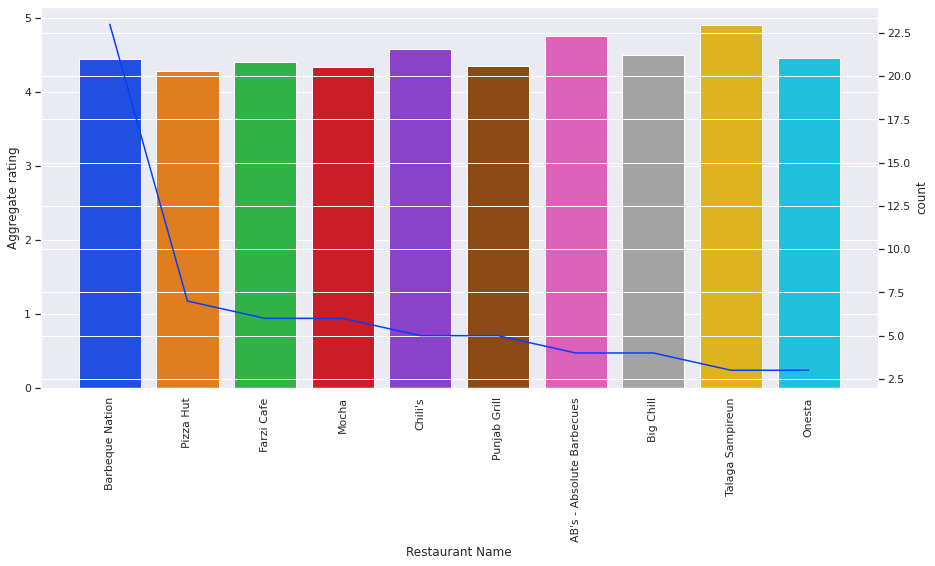

In [29]:
plt.subplots(figsize = (15, 7))
plt.xticks(rotation='vertical')
ax = sns.barplot(x='Restaurant Name', y='Aggregate rating', data=top_rated)
ax2 = ax.twinx()
sns.lineplot(x='Restaurant Name',y='count',data=top_rated,ax=ax2)

# 7. Most popular cuisines for some top cities

In [30]:
# Using isnull() from Pandas to get the Null/NaN values in the each column in dataset 
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
INR_value               0
New avg for two         0
dtype: int64

In [31]:
# Using only non null values.
dfc=df[~df['Cuisines'].isna()]

In [32]:
# As we can see that Cuisines column is of string type so first we need to change its type from string to list to do analysis.
df.loc[0,'Cuisines']

'French, Japanese, Desserts'

In [33]:
# Here we are creating function in order to change its type from string to list which is taking row value as an argument.
def str_converter(row):
  xy=row.split(',')
  return xy

In [34]:
# Now applying created function on each rows.
df['Cuisines']=dfc.loc[:,'Cuisines'].apply(str_converter)

In [35]:
# This is the another way to do the same task.
# df['Cuisines']=dfc.apply(lambda x: str_converter(x['Cuisines']),axis=1)

In [36]:
# Exploding the Cuisines column to seperate each Cuisines elements from the list.
exploded_df=df.explode('Cuisines')


* Finding out popular Cuisines of each city

In [37]:
grouped_res=exploded_df.groupby(['City','Cuisines']).size().reset_index(name='count').sort_values(by='count',ascending=False)
grouped_res

,City,Cuisines,count
1617,New Delhi,North Indian,1848
1512,New Delhi,Chinese,1069
1517,New Delhi,Fast Food,858
1549,New Delhi,North Indian,577
1584,New Delhi,Chinese,569
...,...,...,...
1009,Guwahati,Arabian,1
1008,Guwahati,American,1
1007,Gurgaon,Tibetan,1
1003,Gurgaon,Steak,1


In [38]:
# Displaying  the most popular Cuisines of each city by removing duplicates from above grouped result.
pop_cuisines=grouped_res.drop_duplicates('City')[['City','Cuisines','count']][:20]
pop_cuisines

,City,Cuisines,count
1617,New Delhi,North Indian,1848
1707,Noida,North Indian,433
992,Gurgaon,North Indian,367
823,Faridabad,North Indian,102
135,Amritsar,North Indian,15
1944,Ranchi,Chinese,13
1766,Patna,Chinese,12
45,Agra,North Indian,12
1991,Rio de Janeiro,Brazilian,10
122,Allahabad,North Indian,10


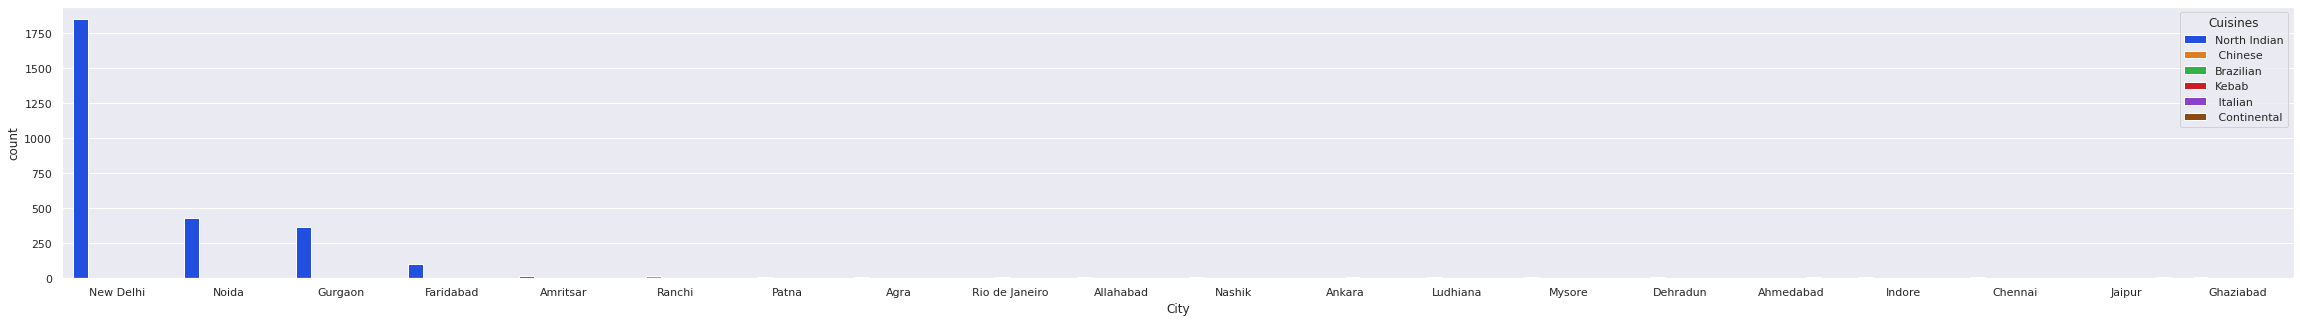

In [39]:
# Visualizing  the most popular Cuisines.
plt.figure(figsize = (40,5))
sns.set_palette('bright')
plt.xticks(rotation=0)
sns.barplot(x='City',y='count',hue='Cuisines',data=pop_cuisines)

* Most popular cuisines for some top cities excluding out indian city

In [40]:
exploded_non_india=exploded_df[exploded_df['Country']!='India']

In [41]:
grouped_res_non_india=exploded_non_india.groupby(['City','Cuisines']).size().reset_index(name='count').sort_values(by='count',ascending=False)
grouped_res_non_india

,City,Cuisines,count
63,Ankara,Kebab,10
874,Rio de Janeiro,Brazilian,10
473,Dubuque,American,9
921,Savannah,American,8
1032,Sí£o Paulo,Brazilian,8
...,...,...,...
487,Edinburgh,Desserts,1
488,Edinburgh,French,1
489,Edinburgh,Grill,1
490,Edinburgh,Italian,1


In [42]:
pop_cus_non_india=grouped_res_non_india.drop_duplicates('City')[['City','Cuisines','count']][:20]
pop_cus_non_india

,City,Cuisines,count
63,Ankara,Kebab,10
874,Rio de Janeiro,Brazilian,10
473,Dubuque,American,9
921,Savannah,American,8
1032,Sí£o Paulo,Brazilian,8
373,Davenport,American,8
458,Dubai,Indian,8
201,Boise,American,8
560,Jakarta,Western,7
271,Cedar Rapids/Iowa City,American,7


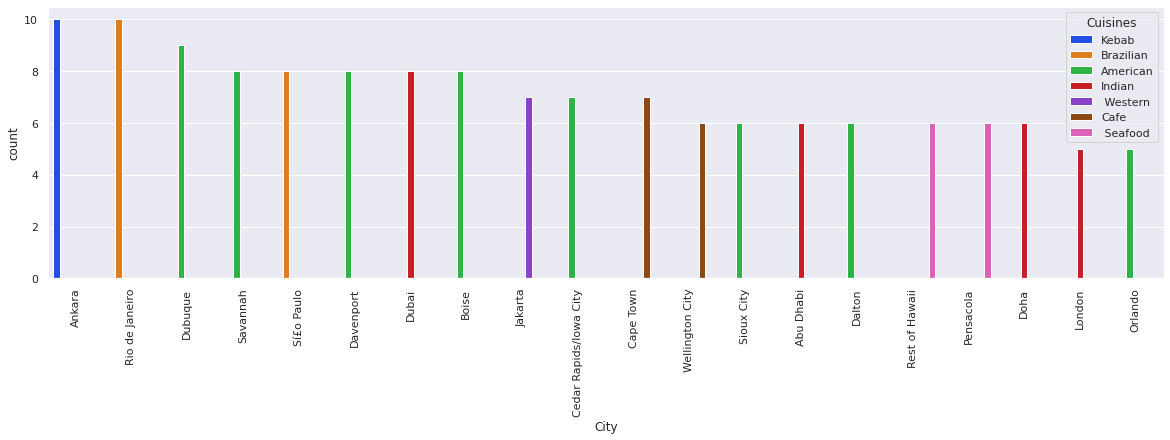

In [43]:
# Visualizing  the most popular Cuisines.
plt.figure(figsize = (20,5))
sns.set_palette('bright')
plt.xticks(rotation='vertical')
sns.barplot(x='City',y='count',hue='Cuisines',data=pop_cus_non_india)

# 8.Online delivery availablity analysis.

In [44]:
deliv_type=df.groupby(['Has Online delivery']).size().reset_index(name='count')
deliv_type

,Has Online delivery,count
0,No,7100
1,Yes,2451


In [45]:
del_t=df['Has Online delivery'].value_counts()
print(f"Total count of each type of delivery where no denotes not online delivery and yes denotes online delivery:\n\n{del_t}")

Total count of each type of delivery where no denotes not online delivery and yes denotes online delivery:

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64


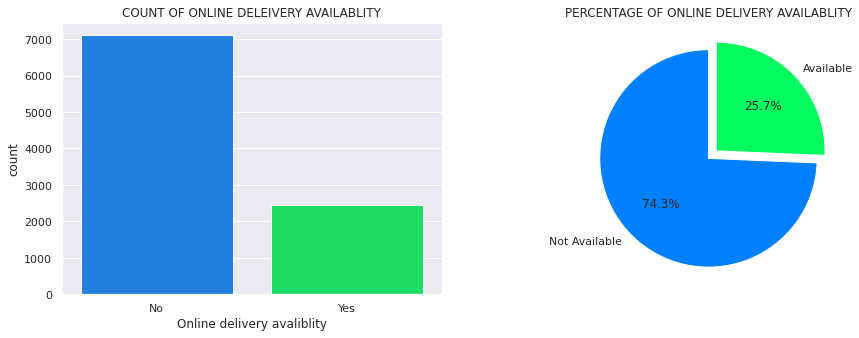

In [46]:
# Using countplot from seaborn to get the count of bookings for each type of hotel

sns.set(font_scale = 1)
sns.set_palette('gist_ncar')
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)

sns.countplot(df['Has Online delivery'])

plt.title('COUNT OF ONLINE DELEIVERY AVAILABLITY')
plt.xlabel('Online delivery avaliblity')
plt.ylabel('count')


# Using pie from matplot to get the percent of bookings for each type of hotel

plt.subplot(1, 2, 2)

plt.pie(list(del_t), labels=['Not Available', 'Available'], 
        autopct='%1.01f%%',startangle=90, explode= (0, 0.1))

plt.title('PERCENTAGE OF ONLINE DELIVERY AVAILABLITY')


plt.show()

* Online delivery availablity country wise.

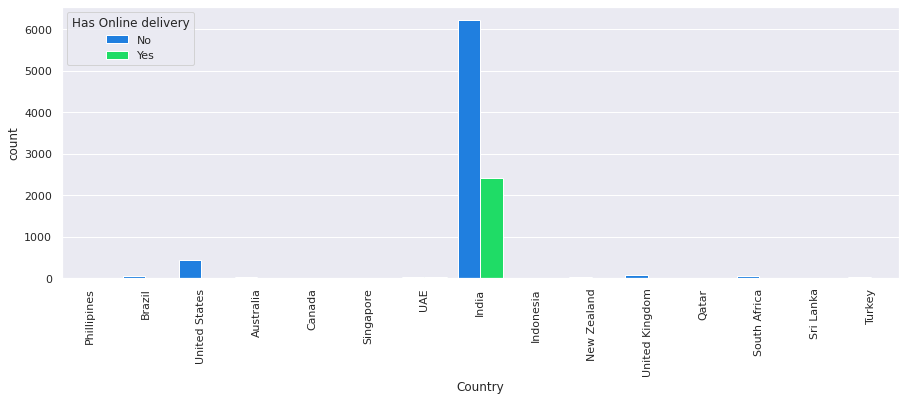

In [47]:
sns.set(font_scale = 1)
sns.set_palette('gist_ncar')
plt.figure(figsize = (15,5))
plt.xticks(rotation='vertical')
sns.countplot(x='Country',hue='Has Online delivery',data=df)


* Online delivery for diffrent types of indian cities

In [48]:
df_ind=df[df['Country']=='India']

In [49]:
df_ind.groupby(['City','Has Online delivery']).size().reset_index(name='Count').sort_values(by='Count',ascending=False)[:10]

,City,Has Online delivery,Count
45,New Delhi,No,3984
46,New Delhi,Yes,1489
47,Noida,No,716
22,Gurgaon,No,693
23,Gurgaon,Yes,425
48,Noida,Yes,364
17,Faridabad,No,216
18,Faridabad,Yes,35
9,Bhubaneshwar,No,21
4,Amritsar,No,21


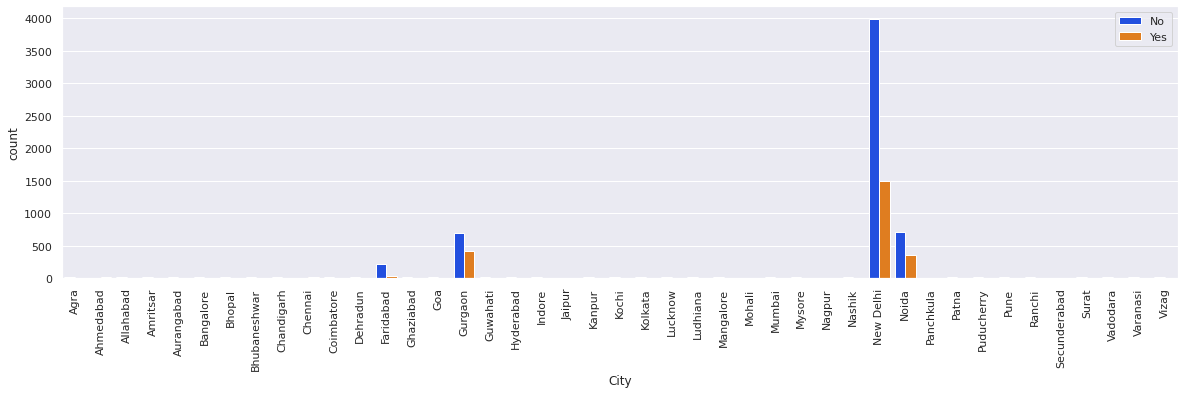

In [50]:
sns.set(font_scale = 1)
sns.set_palette('bright')
plt.figure(figsize = (20,5))
plt.xticks(rotation='vertical')
sns.countplot(x='City',hue='Has Online delivery',data=df_ind)
plt.legend(loc=1)

# 9.Table booking analysis.

In [51]:
table_b=df['Has Table booking'].value_counts()
print(f"Total count of table booking availablity where no denotes not available  and yes denotes available :\n\n{table_b}")

Total count of table booking availablity where no denotes not available  and yes denotes available :

No     8393
Yes    1158
Name: Has Table booking, dtype: int64


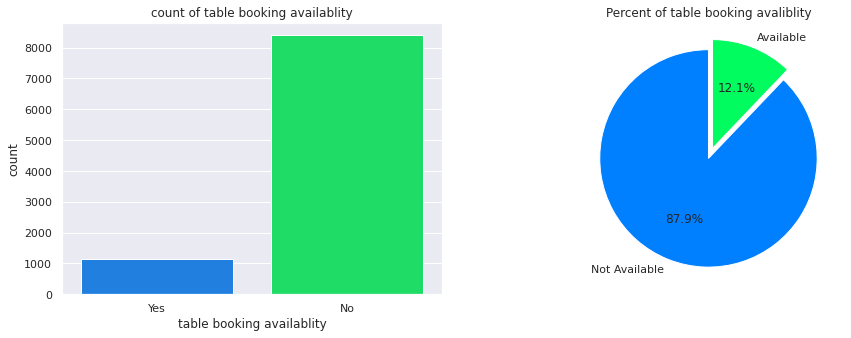

In [52]:
# Using countplot from seaborn to get the count of bookings for each type of hotel

sns.set(font_scale = 1)
sns.set_palette('gist_ncar')
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)

sns.countplot(df['Has Table booking'])

plt.title('count of table booking availablity')
plt.xlabel('table booking availablity')
plt.ylabel('count')


# Using pie from matplot to get the percent of bookings for each type of hotel

plt.subplot(1, 2, 2)

plt.pie(list(table_b), labels=['Not Available', 'Available'], 
        autopct='%1.01f%%',startangle=90, explode= (0, 0.1))

plt.title('Percent of table booking avaliblity')


plt.show()

# 10.Votings Analysis

* Checking votings of each city of India and doing some analysis by using votings features

In [53]:
idf=df[df['Country']=='India']
idf.describe(include='object').T

,count,unique,top,freq
Restaurant Name,8652,6604,Cafe Coffee Day,83
City,8652,43,New Delhi,5473
Address,8652,8025,"Dilli Haat, INA, New Delhi",11
Locality,8652,784,Connaught Place,122
Locality Verbose,8652,841,"Connaught Place, New Delhi",122
Cuisines,8652,1392,[North Indian],936
Currency,8652,1,Indian Rupees(Rs.),8652
Has Table booking,8652,2,No,7541
Has Online delivery,8652,2,No,6229
Is delivering now,8652,2,No,8618


In [54]:
votes=idf.groupby('City')['Votes'].sum().reset_index().sort_values(by='Votes',ascending=False)[:10]
votes

,City,Votes
31,New Delhi,628340
15,Gurgaon,132160
32,Noida,73488
5,Bangalore,56115
22,Kolkata,44593
27,Mumbai,29697
9,Chennai,27695
17,Hyderabad,24135
36,Pune,20732
14,Goa,15098


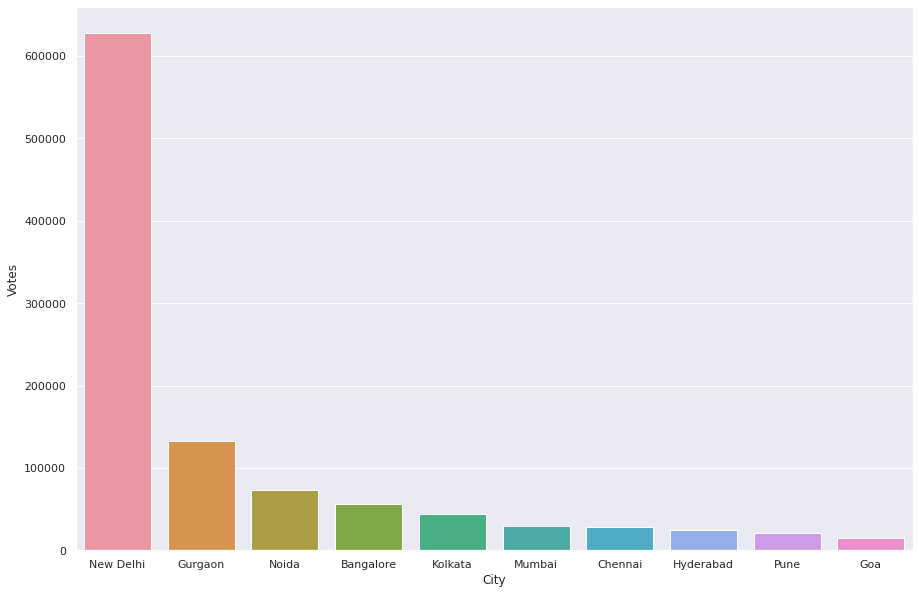

In [55]:
plt.figure(figsize=(15,10))
sns.barplot(x='City',y='Votes',data=votes)

In [56]:
votes_res=idf.groupby('Restaurant Name')['Votes'].sum().reset_index().sort_values(by='Votes',ascending=False)[:10]
votes_res

,Restaurant Name,Votes
605,Barbeque Nation,27835
89,AB's - Absolute Barbecues,13400
6173,Toit,10934
713,Big Chill,10853
6204,Truffles,9682
2047,Farzi Cafe,9189
1355,Chili's,8156
2550,Hauz Khas Social,7931
2876,Joey's Pizza,7807
4341,Peter Cat,7574


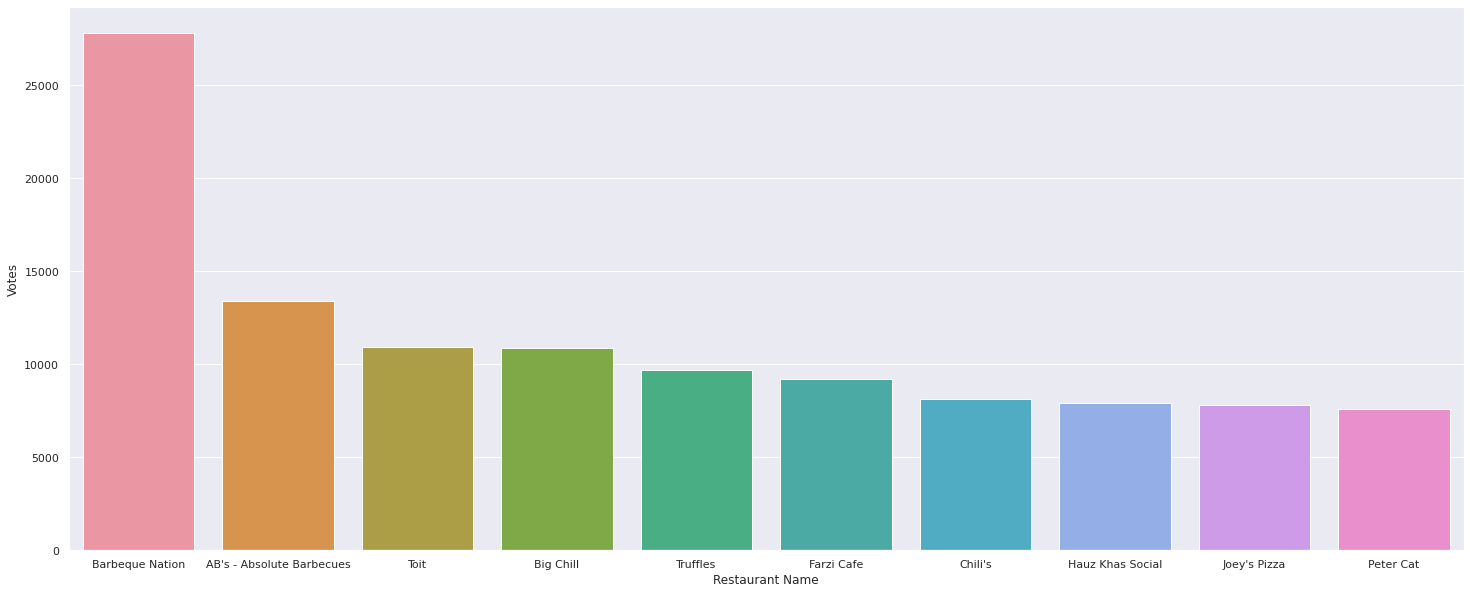

In [57]:
plt.figure(figsize=(25,10))
sns.barplot(x='Restaurant Name',y='Votes',data=votes_res)

* Checking Voting of each restaurant across the world 

In [58]:
votes_res_all=df.groupby(['Country','Restaurant Name'])['Votes'].sum().reset_index().sort_values(by='Votes',ascending=False)
votes_res_all

,Country,Restaurant Name,Votes
691,India,Barbeque Nation,27835
175,India,AB's - Absolute Barbecues,13400
6259,India,Toit,10934
799,India,Big Chill,10853
6290,India,Truffles,9682
...,...,...,...
5625,India,Swiss Gourmessa,0
5623,India,Sweets n Treats,0
292,India,Al Meraj Chicken Shop,0
5618,India,Sweetcake.in,0


* Checking Voting of each restaurant across the world and picking out most voted restaurant for each country

In [59]:
most_voted_res=votes_res_all.drop_duplicates('Country')[['Country','Restaurant Name','Votes']]
most_voted_res

,Country,Restaurant Name,Votes
691,India,Barbeque Nation,27835
6704,Indonesia,Talaga Sampireun,5514
7078,United States,Bern's Steak House,3157
6921,UAE,AB's Absolute Barbecues,3151
6763,Phillipines,Silantro Fil-Mex,1364
7047,United Kingdom,Yauatcha,1326
6900,Turkey,J'adore Chocolatier,1311
6819,South Africa,Craft,1207
6736,New Zealand,Milse,754
22,Australia,Vivo Bar and Grill,381


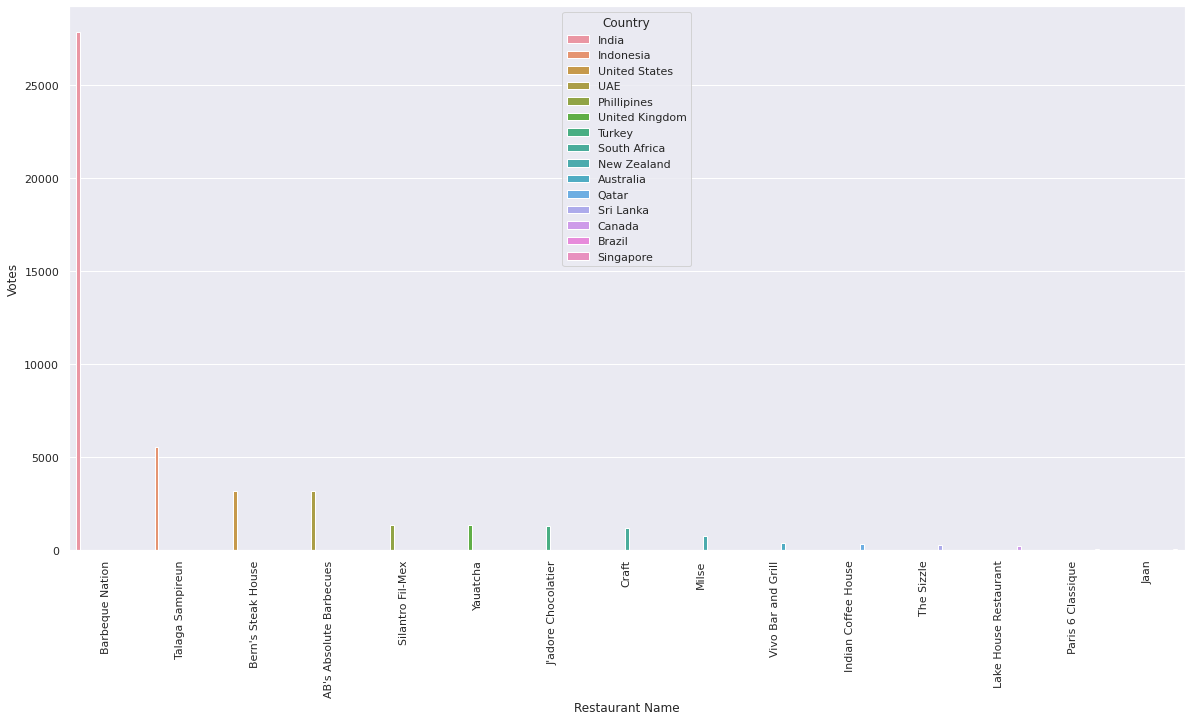

In [60]:
sns.set(font_scale = 1)
sns.set_palette('bright')
plt.figure(figsize = (20,10))
plt.xticks(rotation='vertical')
sns.barplot(x='Restaurant Name',y='Votes',hue='Country',data=most_voted_res)

In [61]:
most_voted_res_ex_ind=most_voted_res[most_voted_res['Country']!='India']

* Checking Voting of each restaurant across the world and picking out most voted restaurant for each country excluding India.

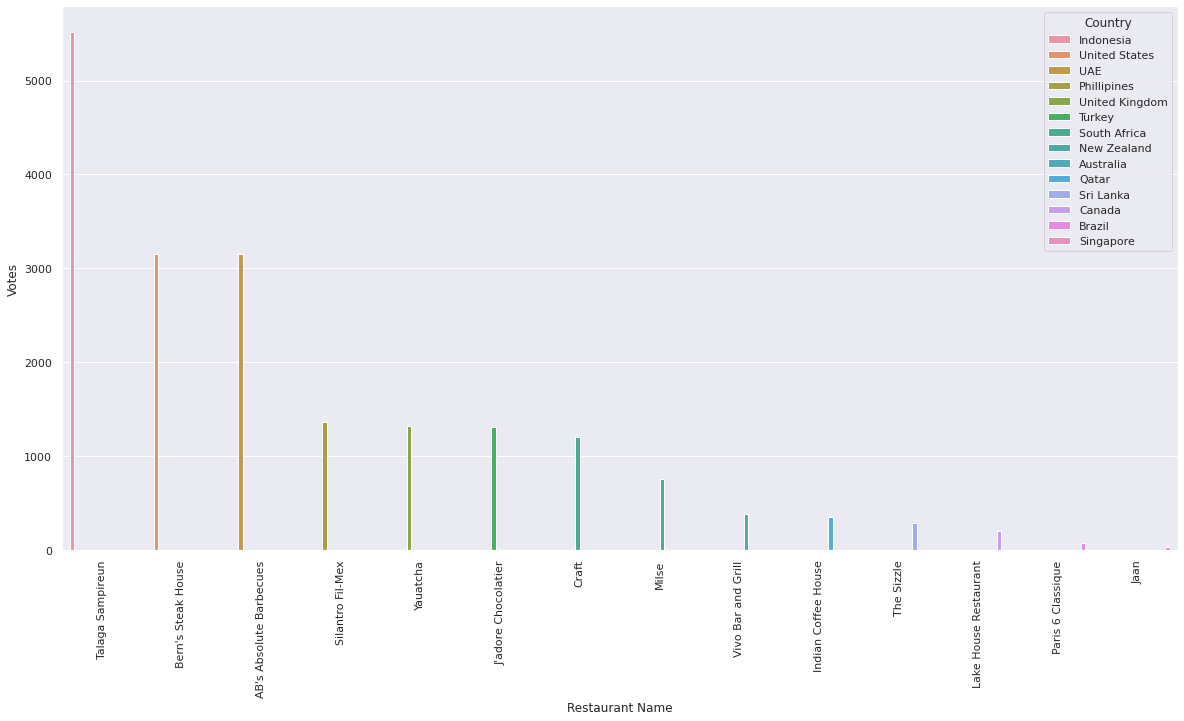

In [62]:
sns.set(font_scale = 1)
sns.set_palette('bright')
plt.figure(figsize = (20,10))
plt.xticks(rotation='vertical')
sns.barplot(x='Restaurant Name',y='Votes',hue='Country',data=most_voted_res_ex_ind)

# **CONCLUSIONS AND INFERENCES**

1. *Cafe coffe day is the most available restaurant.*: ✅

2. *Restaurant Andre	is the most priced restaurant* ❎

3. *Singapore has lot's of high priced Restaurants* 🌏

4. *New delhi has most number of restaurants listed by zomato*

5. **Talaga Sampireun**  is the best restaurant in terms of rating but **Barbeque nation** is best both in terms of ratings and number of upvotes*

6. *North Indian cuisines is the most available cuisines in the dataset* 

7. *Only few hotel has Online delivery* 

8. *New delhi has most availablity of online delivery*

8. *Few hotel has Table booking avalaiblity*

9. *New delhi Restaurant has most number of reviews(Votes).*

10. *Barbeque Nation is the most reviewd(voted) restaurants* ☑

# FUTURE WORK


* Need to explore in depth analysis on Online delivery.

* Need to explore in depth analysis of Table bookings as well.



* IT'S A OLD ZOMATO DATASET WITH ONLY THE RESTAURANT DATA'S THERE IS NO BOOKING DATA IN IT SO CAN NOT PREDICT THE CAUSE AND REASON OF BOOKING OF DIFFRENT PARAMETERS.
*  AS zomato is mostly used to order in india but in foreign countries zomatos are not widely used.